In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/iris_data.csv")

In [3]:
df.shape

(150, 5)

In [4]:
def add_missing_values(df, missing_col, sample_fraction=0.1):
    ix = [(row, col) for row in range(df.shape[0])
      for col in missing_col]
    for row, col in random.sample(ix, int(round(sample_fraction * (df.shape[0]*df.shape[1])))):
    df.iat[row, col] = np.nan
    return df
    

IndentationError: expected an indented block (<ipython-input-4-b708f1807c38>, line 5)

In [6]:
missing_col = [4]

In [7]:
ix = [(row, col) for row in range(df.shape[0])
      for col in missing_col]

In [8]:
sample_fraction = 0.1

In [9]:
for row, col in random.sample(ix, int(round(sample_fraction * (df.shape[0]*df.shape[1])))):
    df.iat[row, col] = np.nan

In [13]:
copy_df = df.copy()
le = LabelEncoder()
for col in copy_df.columns.values:
    if not is_numerical(copy_df, col):
        data = copy_df[col]
        le.fit(data.dropna().values)
        copy_df[col][copy_df.index[copy_df[col].notna()]] = le.transform(copy_df[col].dropna())
#         copy_df[copy_df.index[copy_df.iloc[:,j].notna()], col] = \
#         le.transform(copy_df.iloc[copy_df.index[copy_df.iloc[:,j].notna()], col])
copy_df

<ipython-input-13-4fe49e1d57ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df[col][copy_df.index[copy_df[col].notna()]] = le.transform(copy_df[col].dropna())
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,5.0,1.9,NaN
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,NaN


In [14]:
df_train = copy_df.dropna()

In [ ]:
col = 'class'

In [53]:
missing_indices = copy_df.index[copy_df[col].isna()]

In [15]:
df_train

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
7,5.0,3.4,1.5,0.2,0
9,4.9,3.1,1.5,0.1,0
...,...,...,...,...,...
139,6.9,3.1,5.4,2.1,2
141,6.9,3.1,5.1,2.3,2
143,6.8,3.2,5.9,2.3,2
147,6.5,3.0,5.2,2.0,2


In [19]:
model = return_appropriate_model(df_train, "class")

In [47]:
x, y = x_y_split(df_train, "class")

In [50]:
y=y.astype('int')

In [51]:
model.fit(x, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [56]:
df = pd.read_csv("../datasets/iris_data.csv")
data = df[col]
le.fit(data.values)
df[col] = le.transform(data)

In [58]:
test = df.iloc[missing_indices]

In [59]:
x_t, y_t = x_y_split(test, "class")

In [63]:
y_pred = model.predict(x_t)

In [62]:
y_t

1      0
2      0
3      0
6      0
8      0
      ..
142    2
144    2
145    2
146    2
148    2
Name: class, Length: 75, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_t, y_pred)

0.9333333333333333

In [68]:
def r_a():
    return accuracy_score

In [69]:
a = r_a()
a(y_t, y_pred)

0.9333333333333333

In [252]:
df = pd.read_csv("../datasets/iris_data.csv")
# 150 x 5

In [163]:
df = pd.read_csv("../datasets/abalone.csv")
df = df.dropna()
# 4177 x 9

In [164]:
df = pd.read_csv("../datasets/diamonds.csv")
df = df.dropna()
# 53940 x 10

In [161]:
df = pd.read_csv("../datasets/letter.csv")
df = df.dropna()
#20000 x 17

In [170]:
df = pd.read_csv("../datasets/adult.csv")
df = df.dropna()
#32561 x 15

In [253]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [250]:
for i in range(df.shape[1]): # for each column
    
    copy_df = df.copy()
    org_df = df.copy()
    
    col = copy_df.columns[i] # name of my column
    print(col)
    col_i = [i]
    convert_int_to_float(copy_df)
    convert_int_to_float(org_df)
    
    add_missing_values(copy_df, col_i, 0.1) #add missing values
    #print(copy_df.head(20))
    encode(copy_df) # encode all categorical/string columns to integer
    encode(org_df) 
    #print(copy_df.head(20))
    x_train, y_train, x_test, y_test = get_train_test_data(copy_df, org_df, col)
    
    if not(is_numerical(df, col)):
        y_train = y_train.astype('int')
        y_test = y_test.astype('int')
         
    model, metric = return_appropriate_model_and_metric(copy_df, col)
    #print(model, metric)
    model.fit(x_train, y_train)
    print(metric(y_test, model.predict(x_test)))   
    

Sex
0.5215311004784688
Length
0.9031734546475911
Diameter
0.8858594929150597
Height
0.727441517127781
Whole weight
0.9019455252154032
Shucked weight
0.8873692134975312
Viscera weight
0.8642050353641215
Shell weight
0.8167745047724753
Rings
0.38099281123411755


# code below takes care of two columns imputation

In [5]:
def convert_int_to_float(df):
    for i in range(df.shape[1]):
        col = df.columns[i]
        if df[col].dtypes == 'int64':
                df[col] = df[col].astype(float)

In [6]:
def return_appropriate_model_and_metric(df, col):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import r2_score
    if (is_continuous(df, col)):
        regr = RandomForestRegressor(random_state=0)
        parameters = {
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 16, 64, 256],
            'min_samples_leaf': [1, 2, 4]
        }
        clf = GridSearchCV(regr, parameters)
        return regr, r2_score, True
    else:
        rfclass = RandomForestClassifier(random_state=0)
        parameters = {
            'n_estimators': [50, 100, 150],
            'max_depth': [2, 16, 64, 256],
            'min_samples_split': [2, 4, 6]
        }
        clf = GridSearchCV(rfclass, parameters)
        return rfclass, accuracy_score, False

In [7]:
def return_appropriate_model_and_metric_2(df, col):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import r2_score
    if (is_continuous(df, col)):
        regr = LinearRegression()
        return regr, r2_score, True
    else:
        rfclass = LogisticRegression(random_state=0)
        return rfclass, accuracy_score, False

In [8]:
def get_train_test_data(df, org_df, col): #col is column name in string
    df_train = df.dropna()
    x_train, y_train = x_y_split(df_train, col)
    
    missing_indices = df.index[df[col].isna()]
    df_test = org_df.iloc[missing_indices]
    x_test, y_test = x_y_split(df_test, col)
    return x_train, y_train, x_test, y_test

In [9]:
def encode(df): #pass in index
    for i in range(df.shape[1]):
        col = df.columns[i]
        le = LabelEncoder()
        if not is_numerical(df, col):
            data = df[col]
            le.fit(data.dropna().values)
            df.iloc[df.index[df[col].notna()], i] = le.transform(df[col].dropna())

In [10]:
def add_missing_values(df, missing_col, sample_fraction=0.1):
    #inplace insertion of missing values
    ix = [(row, col) for row in range(df.shape[0])
      for col in missing_col]
    for row, col in random.sample(ix, int(round(sample_fraction * (df.shape[0]*len(missing_col))))):
        df.iat[row, col] = np.nan

In [11]:
def is_continuous(df, column_name):
    """
    Whether this column has only continuous numerical data.
    """
    return df[column_name].dtypes.kind in (np.typecodes["AllFloat"])

In [12]:
def is_numerical(df, column_name):
    """
    Whether this column has only numerical data, which can be either discrete
    or continuous.
    """
    return df[column_name].dtypes.kind in (
        np.typecodes["AllInteger"] + np.typecodes["AllFloat"])

In [13]:
def x_y_split(df, col):
    #y_train = df.iloc[:, df.columns == col]
    y_train = df[col]
    x_train = df.iloc[:, df.columns != col]
    return x_train, y_train

In [ ]:
def x_y_split_m(df, col):
    y_train = df.loc[:, col]
    temp = list(set(df.columns) - set(col))
    columns = [df.columns.get_loc(c) for c in temp]
    #print(columns)
    columns.sort()
    x_train = df.iloc[:, columns]
    return x_train, y_train

In [ ]:
def get_train_test_data_m(df, org_df, col): #col is column name in string
    df_train = df.dropna()
    x_train, y_train = x_y_split_m(df_train, col)
    
    #missing_indices = df.index[df[:,col].isna()]
    missing_indices, _ = np.where(pd.isnull(df))
    df_test = org_df.iloc[missing_indices]
    x_test, y_test = x_y_split_m(df_test, col)
    return x_train, y_train, x_test, y_test

In [ ]:
def cross_validate(X_train, y_train, num_folds, model):
    # Shuffle cross-validation.
    k_fold = KFold(n_splits=num_folds, shuffle=True)
    for train, test in k_fold.split(X_train):
        model.fit(X_train.iloc[train], y_train.iloc[train]).score(
            X_train.iloc[test], y_train.iloc[test])

    return model

In [ ]:
def add_missing_values(df, missing_col, sample_fraction=0.1):
    #inplace insertion of missing values
    ix = [(row, col) for row in range(df.shape[0])
      for col in missing_col]
    for row, col in random.sample(ix, int(round(sample_fraction * (df.shape[0]*len(missing_col))))):
        df.iat[row, col] = np.nan

Read the data frame and randomly generate 'col_n' number of pairs. Each pair is a pair of index, in which each index is for which column to add missnig values into.

In [360]:
df = pd.read_csv("../datasets/iris_data.csv")

In [401]:
df = pd.read_csv("../datasets/abalone.csv")
df = df.dropna()
# 4177 x 9

In [11]:
df = pd.read_csv("../datasets/diamonds.csv")
df = df.dropna()
# 53940 x 10

In [14]:
df = pd.read_csv("../datasets/letter.csv")
df = df.dropna()
#20000 x 17

In [37]:
df = pd.read_csv("../datasets/adult.csv")
df = df.dropna()
#32561 x 15

In [38]:
# how many instances of missing-two-columns 
col_n = 5

In [39]:
possible_cols = [[i,j] for i in range(df.shape[1]) for j in range(i)]
missing_cols = random.sample(possible_cols, col_n)

In [25]:
# take a look at wchih 'col_n' pairs of indices
missing_cols

[[8, 0], [4, 1], [5, 0], [9, 7], [8, 2]]

In [42]:
# each pair has two permutations, generate them 
perms = []
for i in missing_cols:
    perms.append(list(itertools.permutations(i)))

In [43]:
perms

[[(10, 6), (6, 10)],
 [(14, 10), (10, 14)],
 [(12, 8), (8, 12)],
 [(4, 3), (3, 4)],
 [(10, 8), (8, 10)]]

In [44]:
# for each of the permutations
reg = []
reg2 = []

clas = []
clas2 = []

for pair in perms:
    temp_reg = [[],[]]
    temp_clas = [[],[]]
    temp_reg2 = [[],[]]
    temp_clas2 = [[],[]]
    for k, permutation in enumerate(pair):
        # k is index
        # 'permutation' is one of two possible permutations of a missing column index pair
        # i.e. (1,0) and (0,1) are two permutations
        # each permutation means the order in which imputation is done, 
        # so (1,0) means imputing column 1 first, then imputate column 0
        p = permutation
        
        copy_df = df.copy()
        org_df = df.copy()
        convert_int_to_float(copy_df)
        convert_int_to_float(org_df)

        missing_is = list(p)
        missing_cols = []
        for j in missing_is:
            missing_cols.append(df.columns[j])

        add_missing_values(copy_df, missing_is, 0.1) #add missing values on multiple columns

        encode(copy_df) #encode all categorical/string columns to integer
        encode(org_df)

        x_train, y_train, x_test, y_test = get_train_test_data_m(copy_df, org_df, missing_cols)

        # iterate over each missing column in the same order as the curent permutation order
        # train models iteratively
        # x_train, x_test will have incrementally more column, 
        # and y_train y_test will be different each time
        train_is_set = set(range(df.shape[1])) - set(missing_is)

        x_test = x_test.reset_index(drop=True)

        for i,val in enumerate(missing_is):

            col = missing_cols[i]
            #print(col)

            # get appropriate model and metric
            # 'model1' is either a random forest regressor or a random forest classifier
            model1, metric, is_regr = return_appropriate_model_and_metric(df, col)
            # model2 is either a linear regression or a logisti regression
            model2, metric2, is_regr2 = return_appropriate_model_and_metric_2(df, col)

            y_train_s = y_train[col]
            y_test_s = y_test[col]
            if not(is_numerical(df, col)):
                y_train_s = y_train_s.astype('int')
                y_test_s = y_test_s.astype('int')


            # print(model_with_gridsearch.best_estimator_)
            model1.fit(x_train, y_train_s)
            y_pred = model1.predict(x_test)
            score = round(metric(y_test_s, y_pred), 4)
            
            model2.fit(x_train, y_train_s)
            y_pred2 = model2.predict(x_test)
            score2 = round(metric(y_test_s, y_pred2), 4)
            
            print(score2)
            if is_regr:
                temp_reg[k].append(score)
                temp_reg2[k].append(score2)
            else:
                temp_clas[k].append(score)
                temp_clas2[k].append(score2)
                
        
            x_train = pd.concat([x_train, y_train_s], axis=1)

            new_x_test_column = pd.DataFrame(y_pred, columns = [col])

            data = [x_test, new_x_test_column]
            #print(data)
            x_test = pd.concat(data, axis=1)


            train_is_set.add(val)
            indices = list(train_is_set)
            reorder_cols = [df.columns[j] for j in indices]

            x_train = x_train[reorder_cols]

            x_test = x_test[reorder_cols]
    if temp_reg[0]:
        reg.append(temp_reg)
    if temp_clas[0]:
        clas.append(temp_clas)
    if temp_reg2[0]:
        reg2.append(temp_reg2)
    if temp_clas2[0]:
        clas2.append(temp_clas2)

print(reg)
print(clas)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9171


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1304


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1302


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9109
0.7449


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9183


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9166


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7369


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4721


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8467


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.853


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4648


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3174


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3173


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.317


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.318


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9185


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.859


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.852
0.9146
[]
[[[0.9122, 0.3441], [0.3401, 0.906]], [[0.8346, 0.9146], [0.9151, 0.8236]], [[0.4085, 0.8529], [0.8606, 0.3997]], [[0.3785, 0.3785], [0.3813, 0.3813]], [[0.9152, 0.8667], [0.8681, 0.9122]]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Below code starts writing to the csv. This csv will be used to plot box plot.

In [45]:
dataset = 'adult'
write_data = []
g = '+'
b = '-'

In [46]:
len(reg)

0

In [47]:
len(clas)

5

In [48]:
algo = 'RFRegr'
for pair in reg:
    if sum(pair[0]) > sum(pair[1]):
        for val in pair[0]:
            write_data.append([dataset, algo, g, '', val])
        for val in pair[1]:
            write_data.append([dataset, algo, b, '', val])
    else:
        for val in pair[0]:
            write_data.append([dataset, algo, b, '', val])
        for val in pair[1]:
            write_data.append([dataset, algo, g, '', val])        

In [49]:
algo = 'LinRegr'
for pair in reg2:
    if sum(pair[0]) > sum(pair[1]):
        for val in pair[0]:
            write_data.append([dataset, algo, g, '', val])
        for val in pair[1]:
            write_data.append([dataset, algo, b, '', val])
    else:
        for val in pair[0]:
            write_data.append([dataset, algo, b, '', val])
        for val in pair[1]:
            write_data.append([dataset, algo, g, '', val])

In [50]:
algo = 'RFClf'
for pair in clas:
    if sum(pair[0]) > sum(pair[1]):
        for val in pair[0]:
            write_data.append([dataset, algo, g, val, ''])
        for val in pair[1]:
            write_data.append([dataset, algo, b, val, ''])
    else:
        for val in pair[0]:
            write_data.append([dataset, algo, b, val, ''])
        for val in pair[1]:
            write_data.append([dataset, algo, g, val, ''])        

In [51]:
algo = 'LogReg'
for pair in clas2:
    if sum(pair[0]) > sum(pair[1]):
        for val in pair[0]:
            write_data.append([dataset, algo, g, val, ''])
        for val in pair[1]:
            write_data.append([dataset, algo, b, val, ''])
    else:
        for val in pair[0]:
            write_data.append([dataset, algo, b, val, ''])
        for val in pair[1]:
            write_data.append([dataset, algo, g, val, ''])     

In [52]:
len(write_data)

40

In [53]:
with open('testandplay.csv', 'a') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(write_data)

Below code starts plotting boxplot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

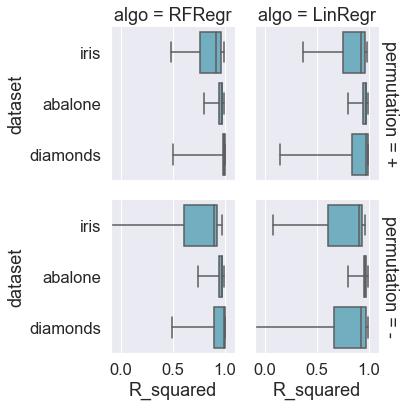

<Figure size 432x288 with 0 Axes>

In [58]:
# plot regression related
plot_df = pd.read_csv('plot_data.csv')
plt.figure()
sns.set(font_scale=1.5)
r = plot_df[plot_df.algo.str.endswith('Regr')]
g = sns.FacetGrid(r, row = 'permutation', col='algo', margin_titles=True, xlim=(-0.1, 1.1))
g.map(sns.boxplot, 'R_squared', 'dataset', whis=np.inf, color='c').set(xticks=[0.0, 0.5, 1.0])
plt.show()
plt.savefig('multi_column_regression_by_imputation_permutation.pdf',
            format='pdf', bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value 

<Figure size 432x288 with 0 Axes>

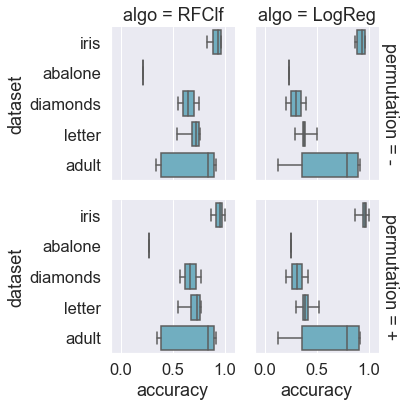

In [60]:
# plot classification related
plot_df = pd.read_csv('plot_data.csv')
plt.figure()
sns.set(font_scale=1.5)
r = plot_df[plot_df.algo.str.endswith('Reg') | plot_df.algo.str.endswith('Clf')]
g = sns.FacetGrid(r, row = 'permutation', col='algo', margin_titles=True, xlim=(-0.1, 1.1))
g.map(sns.boxplot, 'accuracy', 'dataset', whis=np.inf, color='c').set(xticks=[0.0, 0.5, 1.0])
plt.show()